- https://www.wolframalpha.com/input?i=sin%2820*x%29*exp%28-x%5E2%29%2B10*exp%28-x%5E2%29

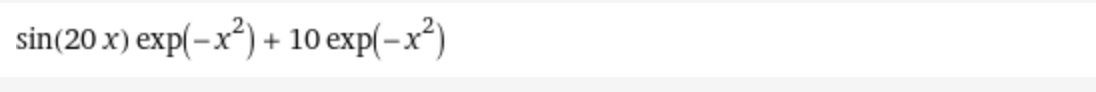

- https://www.wolframalpha.com/input?i=derivative+of+sin%2820*x%29*exp%28-x%5E2%29%2B10*exp%28-x%5E2%29

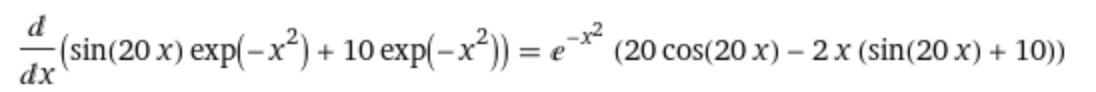

- https://www.wolframalpha.com/input?i=integral+of+sin%2820*x%29*exp%28-x%5E2%29%2B10*exp%28-x%5E2%29

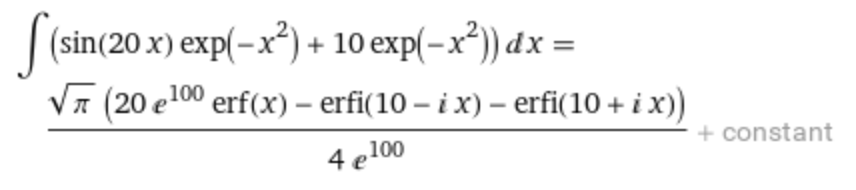

In [1]:
%matplotlib inline
from pylab import *
from sci378 import *

Version:  0.0.30


In [2]:
def fun(x):
    return sin(20*x)*exp(-x**2)+10*exp(-x**2)

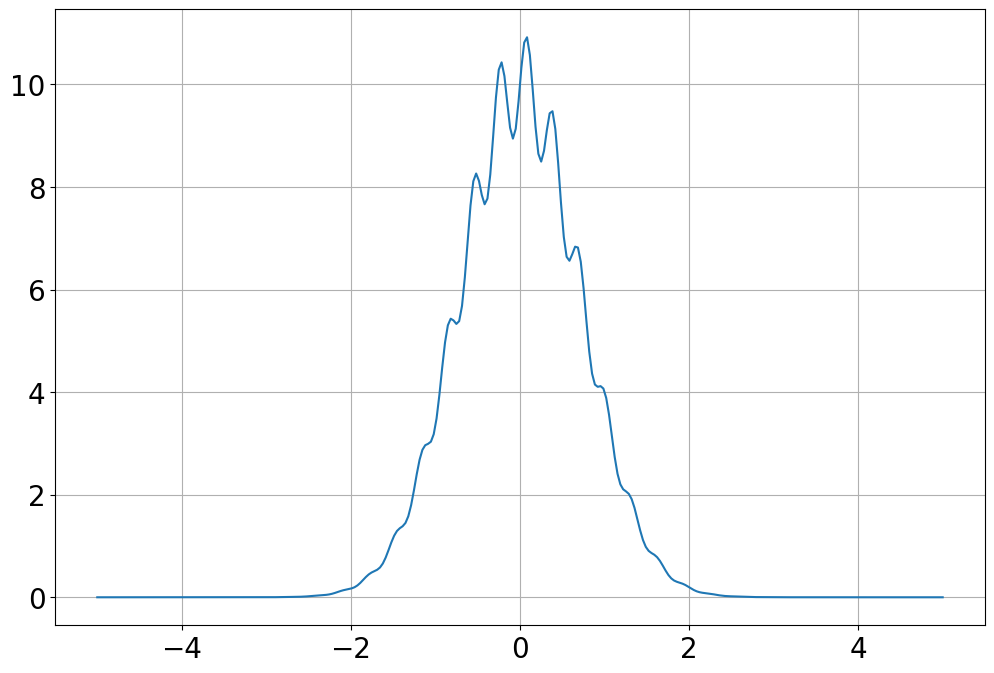

In [3]:
x=linspace(-5,5,300)
y=fun(x)
plot(x,y)

## Derivative

In [4]:
x_start=-5
x_end=5
step=0.01

S=Storage()

x=x_start
while x<=x_end:
    
    # print(x," ",end="")
    
    y_left=fun(x-step/2)
    y_right=fun(x+step/2)
    
    m=(y_right-y_left)/(step) # rise over run
    
    S+=x,m   # saving the result for later
    
    x=x+step
    
print("done.")

x,m=S.arrays()  # give me the saved results as two arrays

done.


In [5]:
def dfun_dx(x):
    return exp(-x**2) *(20*cos(20*x) - 2*x*(10 + sin(20*x)))

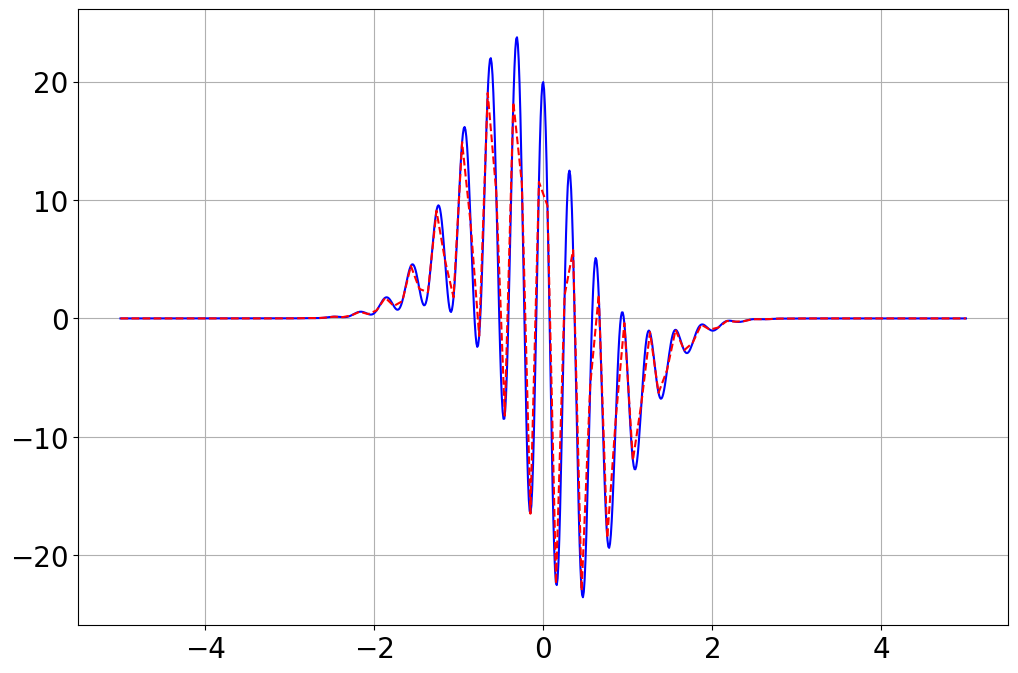

In [6]:
plot(x,m,'b-')  # the numerical derivative

x_expected=linspace(-5,5,100)
y_expected=dfun_dx(x_expected)  # this is the expected from calculus

plot(x_expected,y_expected,'r--')

## Integral

In [7]:
x_start=-5
x_end=5
step=0.01

S=Storage()

x=x_start
total_area=0
while x<=x_end:
        
    y_left=fun(x-step/2)
    y_right=fun(x+step/2)
    
    area_rect=y_right*step
    area_tri=(1/2)*step*(y_left-y_right)
    
    total_area=total_area+area_rect+area_tri
    
    
    S+=x,total_area   # saving the result for later
    
    x=x+step
    
print("done.")

x,total_area=S.arrays()  # give me the saved results as two arrays

done.


In [8]:
def int_fun(x):
    from scipy.special import erf
    return 5*sqrt(pi)*erf(x)  # - (sqrt(pi)*erfi(10 - sqrt(-1)*x))/(4*e**100) - (sqrt(pi)*erfi(10 + sqrt(-1)*x))/(4*e**100)

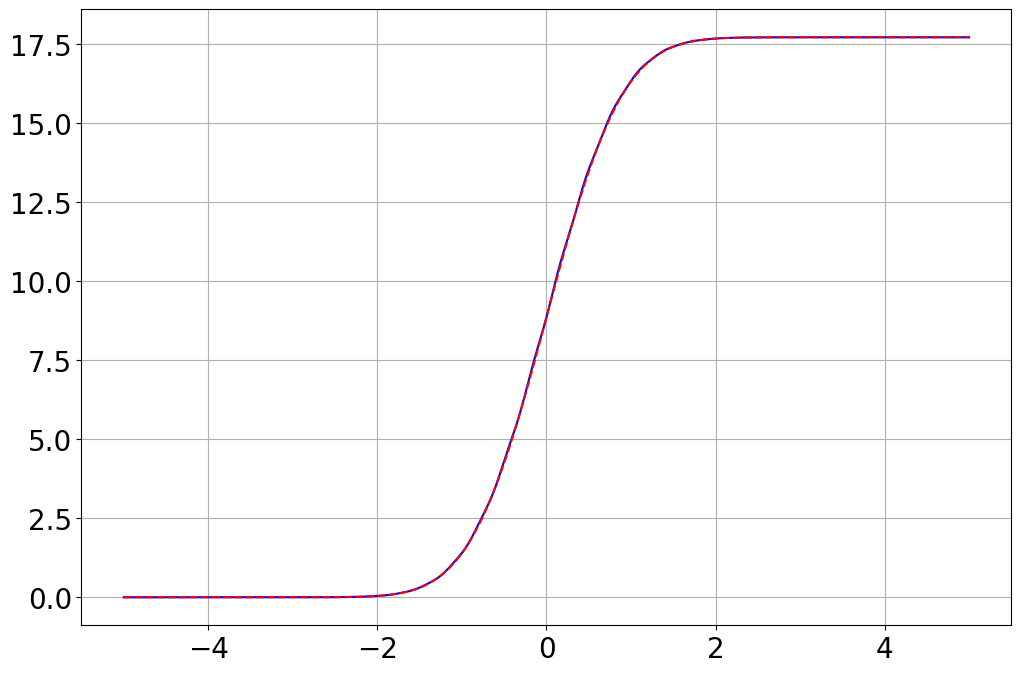

In [9]:
plot(x,total_area,'b-')  # the numerical integral

x_expected=linspace(-5,5,100)
y_expected=int_fun(x_expected)-int_fun(x_start)

plot(x_expected,y_expected,'r--')

## Minimum and maximum

do the derivative and select where it is zero (or crosses the x axis)

In [10]:
def dfun_dx(x,step=0.01):
    y_left=fun(x-step/2)
    y_right=fun(x+step/2)
    

    m=(y_right-y_left)/(step) # rise over run
    
    return m

In [11]:
dfun_dx(2)

-1.0309181627618236

In [12]:
x_start=-5
x_end=5
step=0.01

S=Storage()

x=x_start
number_of_steps=0
while x<=x_end:
    
    # print(x," ",end="")
    
    y_left=dfun_dx(x-step/2)
    y_right=dfun_dx(x+step/2)
    
    if sign(y_left)!=sign(y_right):
        S+=x,y_left, y_right  # saving the result for later
    
    x=x+step
    number_of_steps=number_of_steps+1
    
print("done...",number_of_steps)

x,y_left, y_right=S.arrays()  # give me the saved results as two arrays

x,y_left, y_right

done... 1001


(array([-0.81, -0.75, -0.52, -0.41, -0.22, -0.08,  0.07,  0.25,  0.37,
         0.58,  0.67,  0.92,  0.95]),
 array([ 0.32745279, -1.2143742 ,  1.46053725, -0.8908262 ,  0.69279744,
        -1.03282359,  3.89981916, -0.65634227,  2.26370046, -0.60936966,
         0.41407278, -0.13928957,  0.38773533]),
 array([-0.91024905,  0.01814557, -1.31046881,  2.08400319, -3.16103058,
         2.74794127, -0.23515681,  2.73309051, -1.11101148,  1.50384137,
        -1.7124896 ,  0.37832732, -0.09104205]))

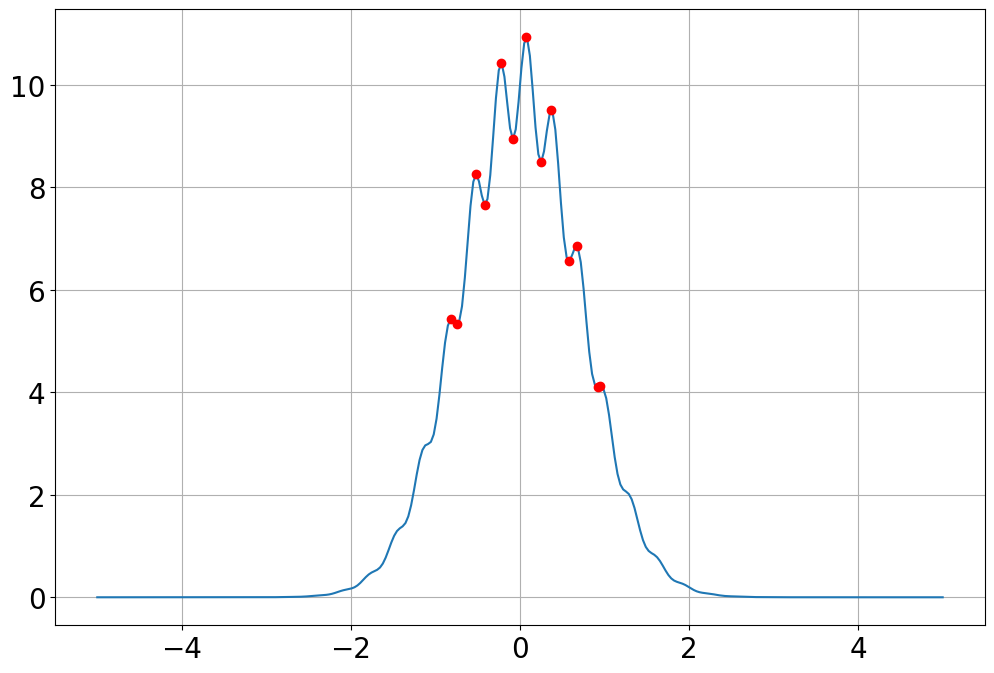

In [13]:

# plot the function
xx=linspace(-5,5,300)
yy=fun(xx)
plot(xx,yy)

plot(x,fun(x),'ro')